In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

food_consumption = pd.read_csv("datasets/food_consumption.csv")
world_happiness = pd.read_csv("datasets/world_happiness.csv")

# Center


In [ ]:
# Filter for Belgium
be_consumption = food_consumption[food_consumption["country"] == "Belgium"]

# Filter for USA
usa_consumption = food_consumption[food_consumption["country"] == "USA"]

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption["consumption"]))
print(np.median(be_consumption["consumption"]))

# Calculate mean and median consumption in USA
print(np.mean(usa_consumption["consumption"]))
print(np.median(usa_consumption["consumption"]))

In [ ]:
# Subset for Belgium and USA only
be_and_usa = food_consumption[
    (food_consumption["country"] == "Belgium") | (food_consumption["country"] == "USA")
]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby("country")["consumption"].agg(["mean", "median"]))

# Spread


In [ ]:
# Interquartile range (IQR)
x = st.iqr(food_consumption["consumption"])
print(x)

In [ ]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption["co2_emission"], [0, 0.25, 0.5, 0.75, 1]))
print(np.quantile(food_consumption["co2_emission"], np.linspace(0, 1, 5)))

In [ ]:
# Calculate the quintiles of co2_emission using np.linspace()
print(np.quantile(food_consumption["co2_emission"], np.linspace(0, 1, 6)))

In [ ]:
# Calculate the deciles of co2_emission using np.linspace()
print(np.quantile(food_consumption["co2_emission"], np.linspace(0, 1, 11)))

In [ ]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')["co2_emission"].agg(['var', 'std']))

# Create histogram of co2_emission for food_category 'beef'
plt.hist(food_consumption[food_consumption["food_category"] == "beef"]["co2_emission"])

# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
plt.hist(food_consumption[food_consumption["food_category"] == "eggs"]["co2_emission"])
# Show plot
plt.show()

In [ ]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby("country")["co2_emission"].sum()

print(emissions_by_country)
print("-----------------------------------------------")

# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

# Correlation

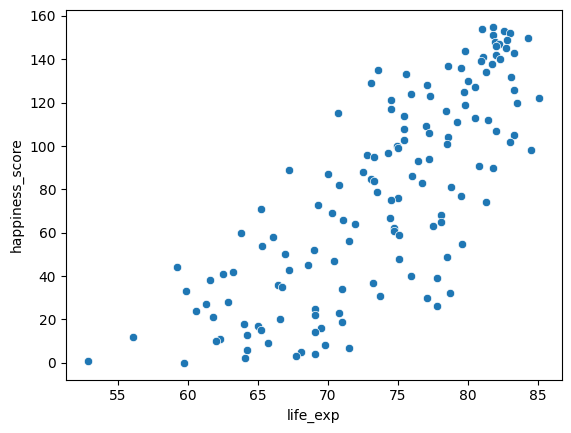

In [37]:
sns.scatterplot(x='life_exp', y='happiness_score', data=world_happiness)
plt.show()


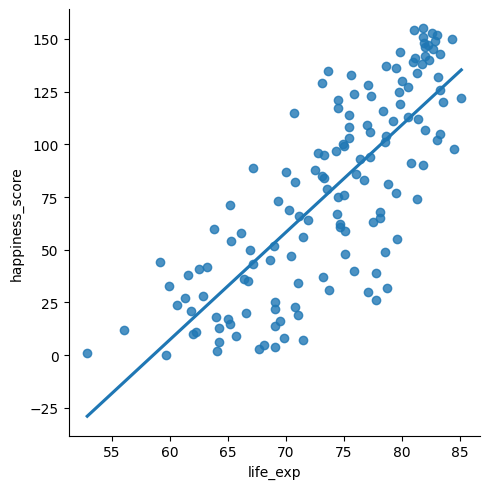

In [42]:
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)
plt.show()

### Calculate Correlation

In [45]:
corr = world_happiness['life_exp'].corr(world_happiness['happiness_score'])
print(corr)

0.7802249053272062
